In [1]:
from google.colab import files

# Upload a file
uploaded = files.upload()

# Access the uploaded file
for filename in uploaded.keys():
    print('Uploaded file:', filename)

Saving archive (6).zip to archive (6).zip
Uploaded file: archive (6).zip


In [2]:
#library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib as plt
import warnings
import seaborn as sns
# Disable DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Your code here

# Enable DeprecationWarning again
warnings.filterwarnings("default", category=DeprecationWarning)

import zipfile
zip_file_path = '/content/archive (6).zip'
# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/target_directory/')

In [3]:
df = pd.read_csv('/content/target_directory/nestle.csv')
#dataset=pd.read_excel("/kaggle/input/prices-of-all-agricultural-commodity/Date-Wise-Prices-all-Commodity.xlsx")
#dataset

#Data Exploration¶

In [4]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,20-April-2022,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,19-April-2022,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18-April-2022,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,13-April-2022,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2553 non-null   object 
 1   Open Price                 2553 non-null   float64
 2   High Price                 2553 non-null   float64
 3   Low Price                  2553 non-null   float64
 4   Close Price                2553 non-null   float64
 5   WAP                        2553 non-null   float64
 6   No.of Shares               2553 non-null   int64  
 7   No. of Trades              2553 non-null   int64  
 8   Total Turnover (Rs.)       2553 non-null   float64
 9   Deliverable Quantity       2551 non-null   float64
 10  % Deli. Qty to Traded Qty  2551 non-null   float64
 11  Spread High-Low            2553 non-null   float64
 12  Spread Close-Open          2553 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

#check null values

In [6]:
df.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         2
% Deli. Qty to Traded Qty    2
Spread High-Low              0
Spread Close-Open            0
dtype: int64

#Remove null values

In [7]:
# Remove rows with null values
df = df.dropna()
df
#df.dropna(['Deliverable Quantity','% Deli. Qty to Traded Qty'],axis=1)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,20-April-2022,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,19-April-2022,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18-April-2022,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,13-April-2022,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,6-January-2012,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25
2549,5-January-2012,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15
2550,4-January-2012,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60
2551,3-January-2012,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35


In [8]:
df.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [9]:
df.shape

(2551, 13)

In [10]:
df.size

33163

In [11]:
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2.551000e+03,2551.000000,2551.000000,2551.000000,2551.000000
mean,9335.655684,9427.351039,9224.573403,9322.587279,9325.203667,5522.303018,1004.203842,4.762314e+07,3264.052528,49.024461,202.777636,-13.068405
std,4939.519226,4985.801142,4878.036837,4931.789757,4928.474440,10420.816889,1137.987345,8.506207e+07,8652.860793,19.119739,174.995455,157.898334
min,3970.000000,3995.000000,3930.000000,3942.450000,3936.768632,39.000000,6.000000,1.721420e+05,33.000000,1.270000,17.000000,-1381.300000
25%,5390.500000,5444.625000,5322.575000,5381.975000,5384.453479,1570.000000,442.000000,1.171583e+07,653.500000,35.575000,88.825000,-71.600000
50%,6804.000000,6866.000000,6746.000000,6809.100000,6811.956570,2618.000000,731.000000,2.219470e+07,1123.000000,46.870000,152.100000,-12.750000
75%,13254.975000,13655.475000,12815.000000,13443.100000,13328.448479,4977.000000,1200.500000,4.940228e+07,2225.500000,59.130000,263.050000,48.275000
max,20452.000000,20599.950000,20243.800000,20439.450000,20417.372402,154684.000000,20964.000000,2.155655e+09,152993.000000,98.930000,1950.000000,1523.300000


#It returns a correlation matrix that shows the correlation coefficients between each pair of columns in the DataFrame.

In [12]:

# Compute the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
corr_matrix

<ipython-input-12-ef8eb32f45ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Open Price,1.000000,0.999722,0.999701,0.999490,0.999693,-0.075962,0.155751,0.191649,-0.093000,-0.246738,0.616225,-0.064897
High Price,0.999722,1.000000,0.999609,0.999792,0.999879,-0.073567,0.162322,0.194633,-0.092403,-0.248603,0.626706,-0.046728
Low Price,0.999701,0.999609,1.000000,0.999761,0.999858,-0.078022,0.150371,0.189099,-0.093886,-0.245208,0.604677,-0.047049
Close Price,0.999490,0.999792,0.999761,1.000000,0.999927,-0.075592,0.156976,0.191918,-0.093174,-0.246861,0.616556,-0.032982
WAP,0.999693,0.999879,0.999858,0.999927,1.000000,-0.075449,0.156842,0.192142,-0.093045,-0.247219,0.616313,-0.041648
No.of Shares,-0.075962,-0.073567,-0.078022,-0.075592,-0.075449,1.000000,0.452115,0.856362,0.868194,0.279279,0.078866,0.015272
No. of Trades,0.155751,0.162322,0.150371,0.156976,0.156842,0.452115,1.000000,0.464949,0.103851,-0.188500,0.433091,0.030637
Total Turnover (Rs.),0.191649,0.194633,0.189099,0.191918,0.192142,0.856362,0.464949,1.000000,0.655851,0.192031,0.274107,-0.000977
Deliverable Quantity,-0.093000,-0.092403,-0.093886,-0.093174,-0.093045,0.868194,0.103851,0.655851,1.000000,0.488715,-0.015550,-0.000877
% Deli. Qty to Traded Qty,-0.246738,-0.248603,-0.245208,-0.246861,-0.247219,0.279279,-0.188500,0.192031,0.488715,1.000000,-0.247729,0.008249


# **Discover and visualize the data to gain insights** 

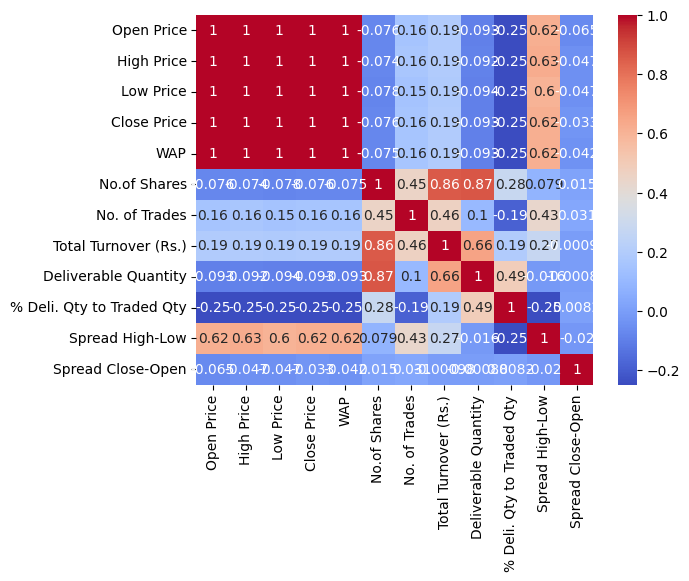

In [13]:
"""
correlation matrix using the seaborn library and displays the plot using matplotlib.

The sns.heatmap() function is used to create the heatmap plot of the correlation matrix, with the following parameters:

corr_matrix: The correlation matrix to be plotted
annot=True: Displays the correlation coefficients as annotations in the heatmap cells
cmap='coolwarm': The color map used in the plot
The plt.show() function is then used to display the plot.
"""
# Create a heatmap plot of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

The pairplot() function creates a grid of scatterplots between pairs of variables in a dataset, and also plots a histogram of each variable along the diagonal.

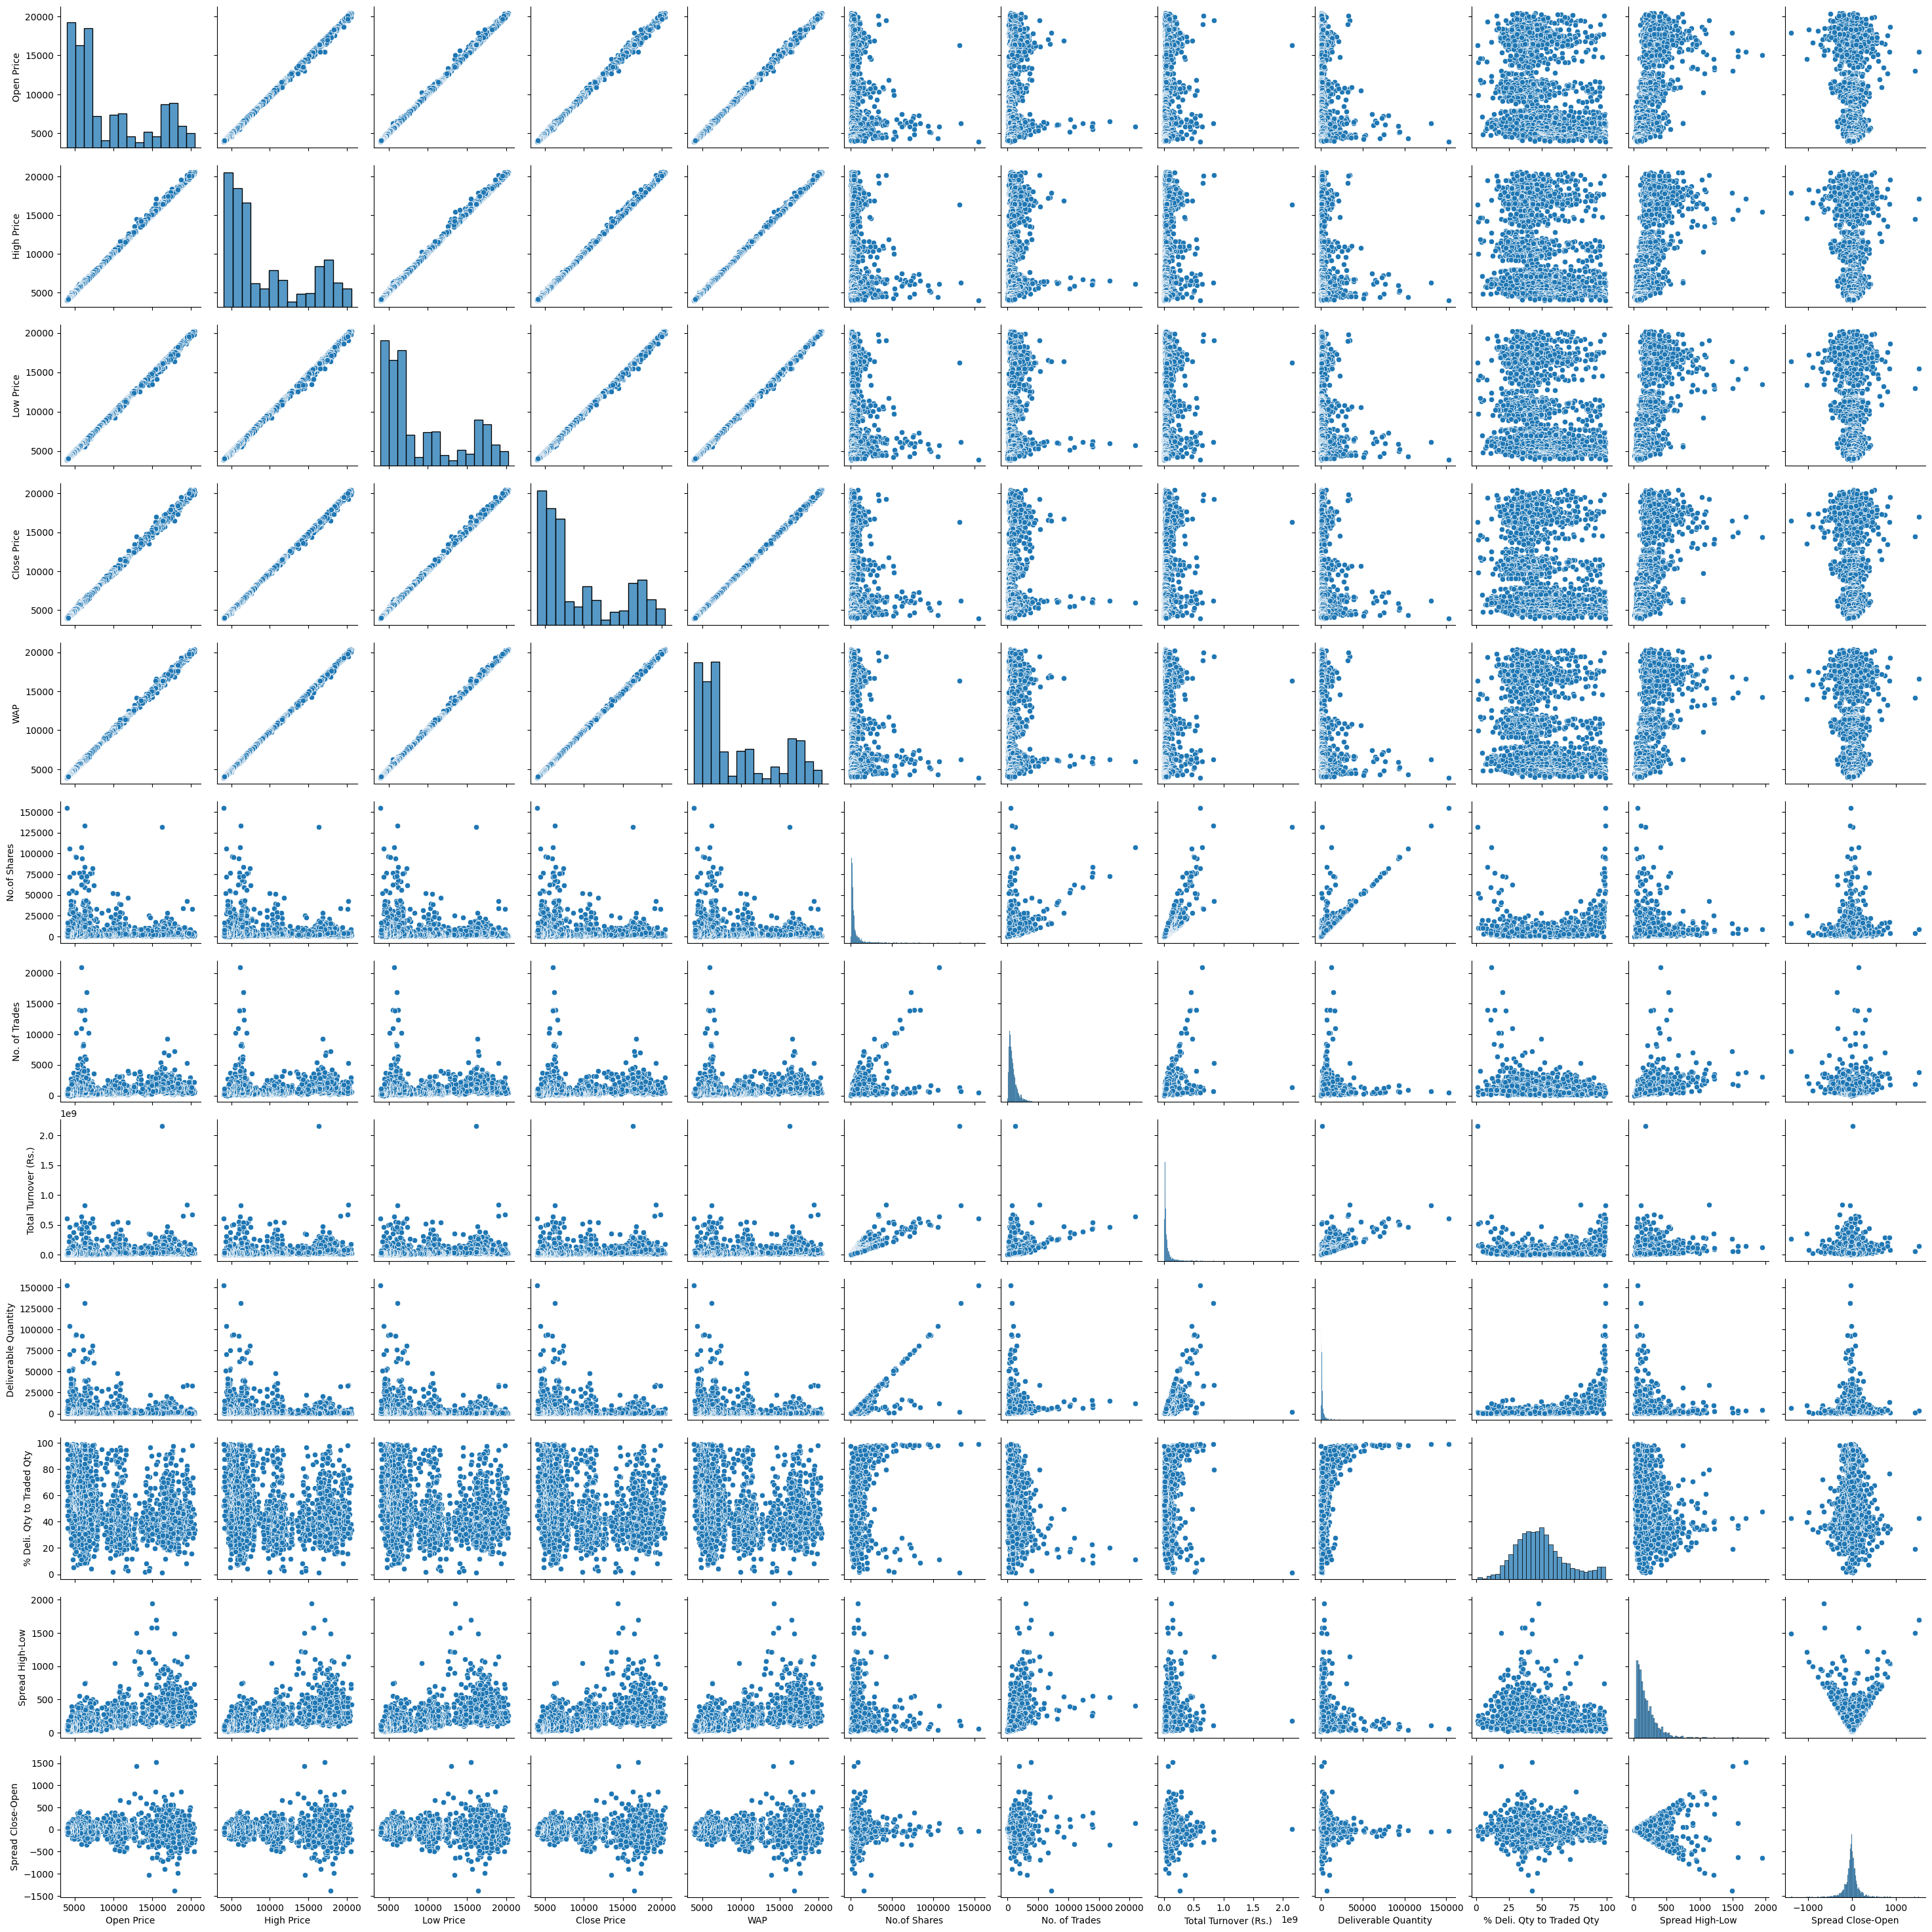

In [14]:
# Create a pairplot of the iris dataset
sns.pairplot(df)

# Show the plot
plt.show()

 *A **scatter plot** is a type of plot that shows the relationship between **two variables**. Each point on the plot represents a pair of values for the two variables being plotted. Scatter plots can be used to identify patterns, trends, and outliers in the data.*

# Here's an example of how to create a scatter plot in pandas:

In this example, **df.plot()** is used to create the **scatter plot**. The kind parameter is set to 'scatter', and the **x and y parameters** are set to the column names of the two variables being plotted.

The **plt.title(), plt.xlabel(), and plt.ylabel()** functions are used to add a title and labels to the plot.

Finally, **plt.show()** is used to display the plot.

You can customize the appearance of the scatter plot further by using additional parameters, such as color, marker, and s, which control the color, marker style, and size of the points, respectively.

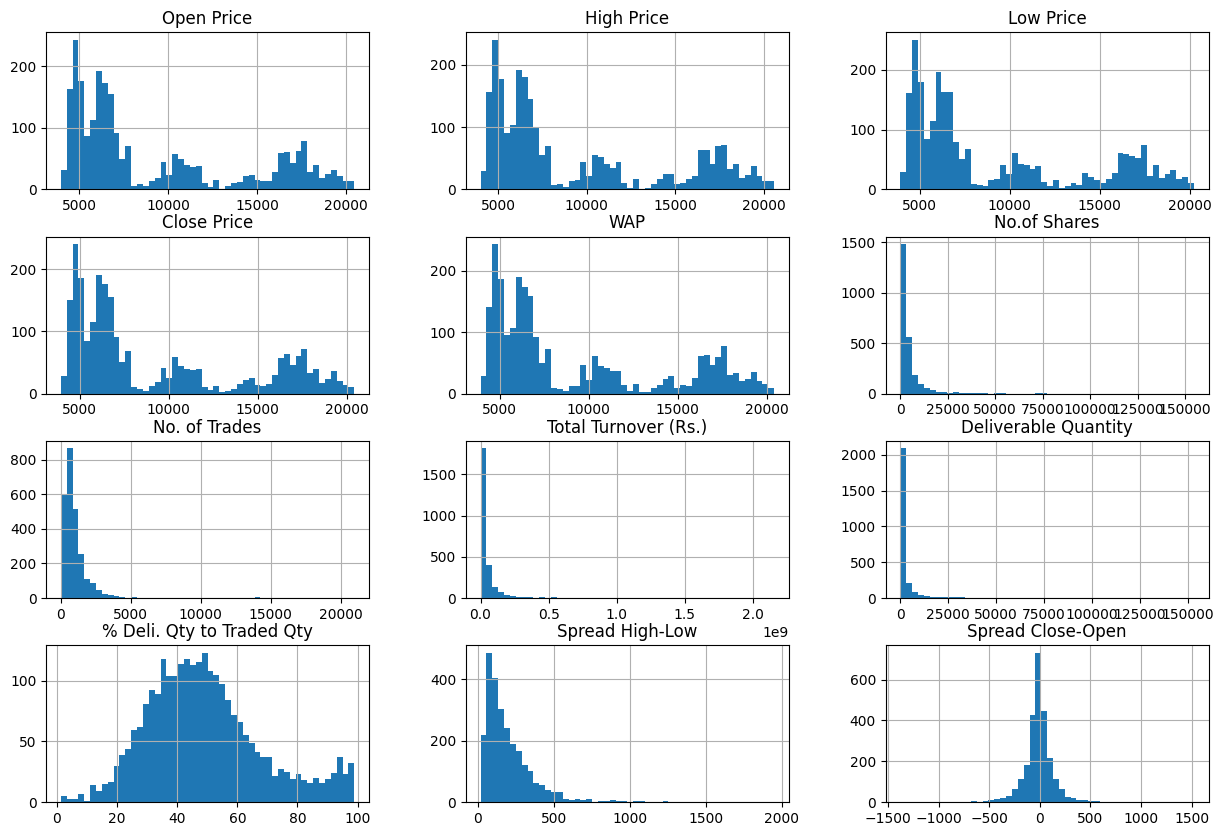

In [16]:
df.hist(bins=50,figsize=(15,10));

<ipython-input-20-f0410937082f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close Price'],hist=True,color='Blue');


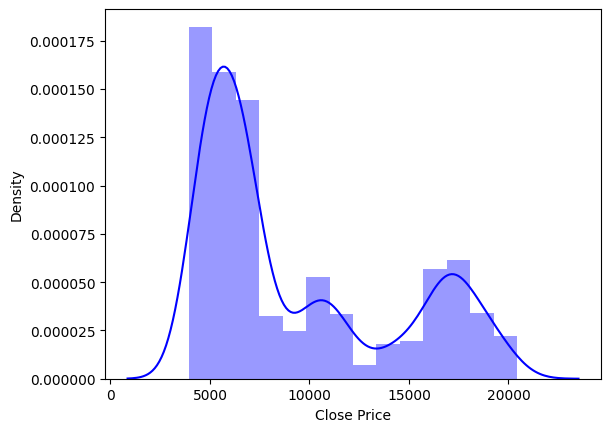

In [20]:
sns.distplot(df['Close Price'],hist=True,color='Blue');

<ipython-input-21-b10556236c6f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='black');
<ipython-input-21-b10556236c6f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='black');
<ipython-input-21-b10556236c6f>:7: UserWarning: 

`distplot` is a deprecated fun

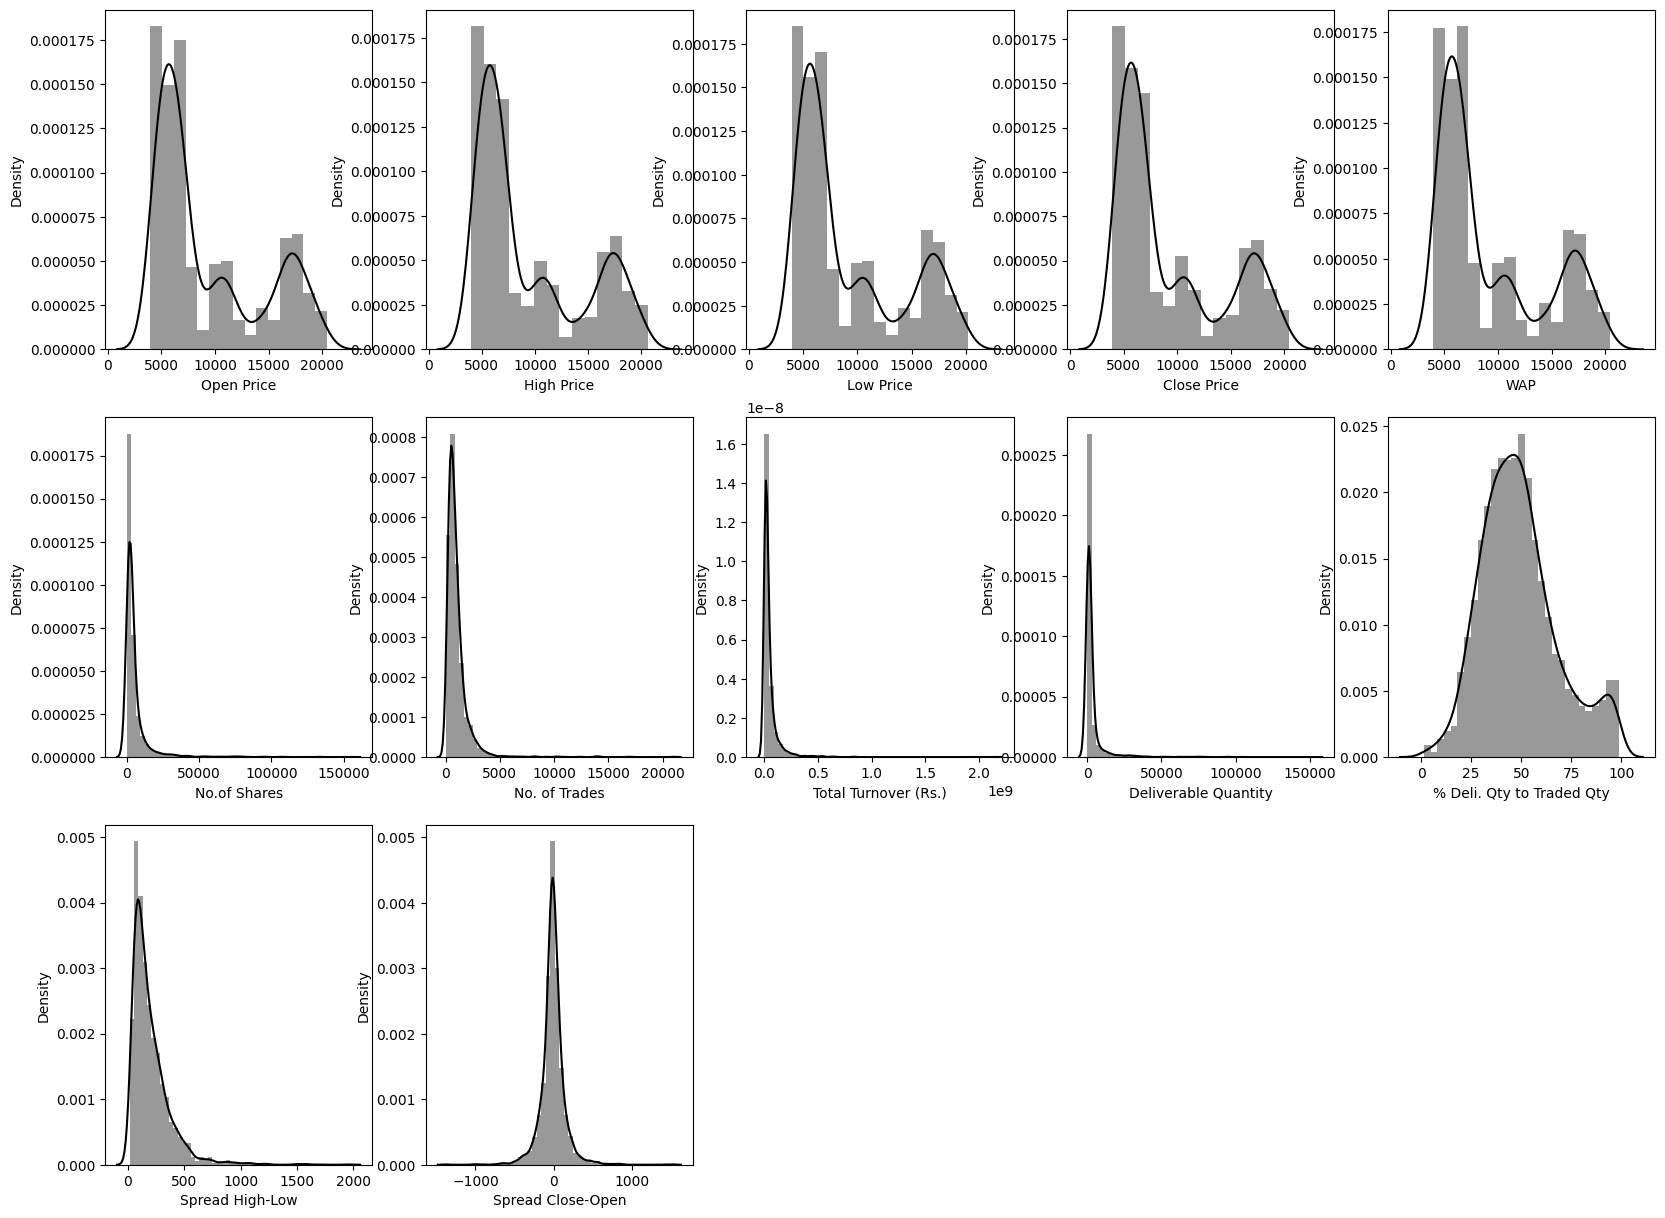

In [21]:
num_col=[col for col in df.columns if df[col].dtype != 'object']
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_col:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column],color='black');
        plt.xlabel(column)
    
        
    plotnumber += 1

#Feature Enginnering
Handling Missing Values

In [22]:
df.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64

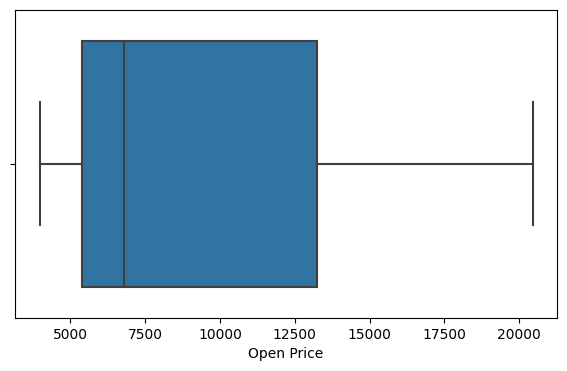

In [23]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Open Price',data=df,orient='h');

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


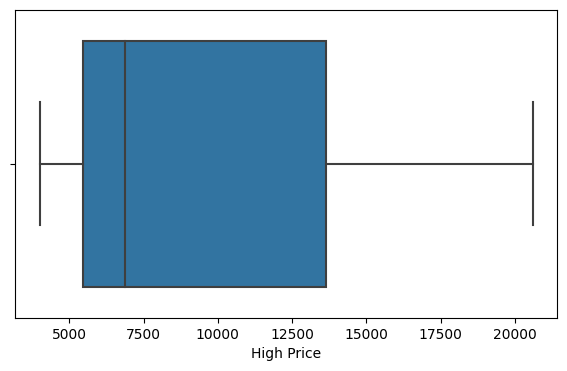

In [24]:
plt.figure(figsize=(7,4))
sns.boxplot(x='High Price',data=df,orient='h');

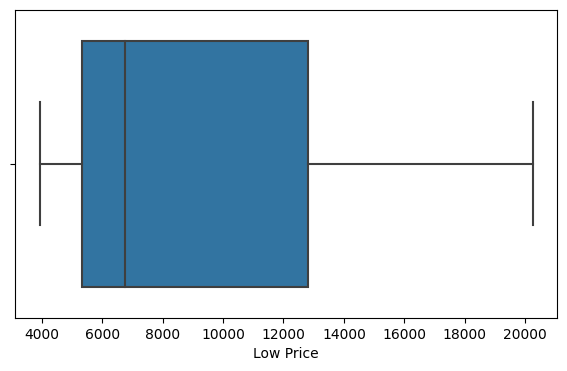

In [25]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Low Price',data=df,orient='h');

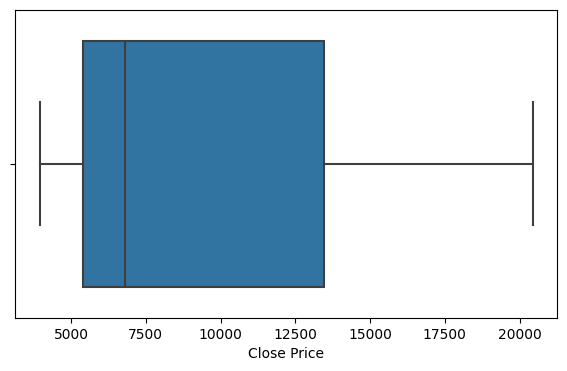

In [26]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Close Price',data=df,orient='h');

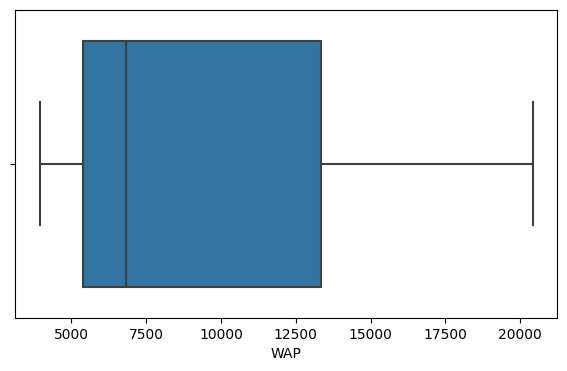

In [27]:
plt.figure(figsize=(7,4))
sns.boxplot(x='WAP',data=df,orient='h');

In [28]:
df['Date'] = pd.to_datetime(df['Date'])

In [29]:
df['Day']=df['Date'].dt.weekday
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [30]:
df.drop('Date',axis=1,inplace=True)

In [31]:
df['Day'].value_counts()

1    513
2    512
3    508
0    508
4    498
5      9
6      3
Name: Day, dtype: int64

In [32]:
df.head(20)

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Day,Month,Year
0,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80,3,4,2022
1,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60,2,4,2022
2,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90,1,4,2022
3,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35,0,4,2022
4,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30,2,4,2022
5,18339.00,18497.00,18216.30,18430.00,18390.222000,2000,537,36780444.0,1412.0,70.60,280.70,91.00,1,4,2022
6,18499.00,18518.35,18225.00,18422.70,18385.862360,712,364,13090734.0,305.0,42.84,293.35,-76.30,0,4,2022
7,18180.00,18500.00,18101.00,18431.10,18361.677527,1197,514,21978928.0,534.0,44.61,399.00,251.10,4,4,2022
8,18198.60,18245.95,17986.75,18175.55,18131.799564,918,357,16644992.0,240.0,26.14,259.20,-23.05,3,4,2022
9,17900.00,18255.35,17871.20,18207.60,18096.243542,813,397,14712246.0,341.0,41.94,384.15,307.60,2,4,2022


In [33]:
days = {1:'Tuesday',0:'Monday',3:'Thursday',2:'Wednesday',4: 'Friday',5:'Saturday',6:'Sunday'}
df['Day'] = df['Day'].map(days)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'no. of trades')

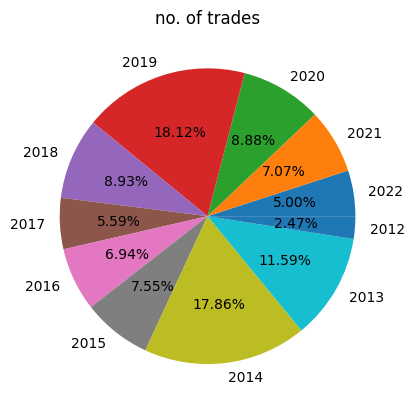

In [36]:
plt.pie(yer,labels=df['Year'].unique(),autopct='%1.2f%%');
plt.title('no. of trades')

In [37]:
dw = df.groupby('Day')['No. of Trades'].sum().reset_index()
dw.head(10)

,Day,No. of Trades
0,Friday,528457
1,Monday,483357
2,Saturday,2011
3,Sunday,933
4,Thursday,518981
5,Tuesday,490994
6,Wednesday,536991


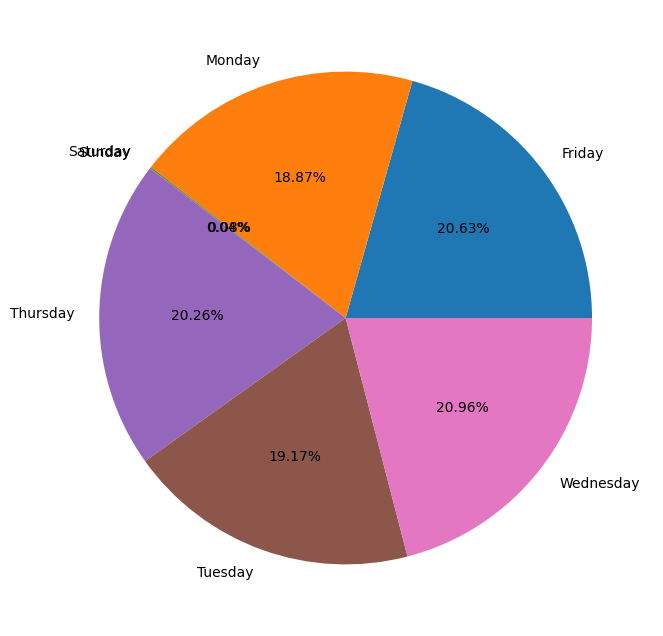

In [38]:
plt.figure(figsize=(10,8))
plt.pie(dw['No. of Trades'],labels= dw['Day'],autopct='%1.2f%%');


In [39]:
dw = df.groupby('Day')['High Price'].sum().reset_index()
dw.head(10)

,Day,High Price
0,Friday,4671316.70
1,Monday,4783685.00
2,Saturday,67300.55
3,Sunday,27766.95
4,Thursday,4816116.55
5,Tuesday,4842013.20
6,Wednesday,4840973.55


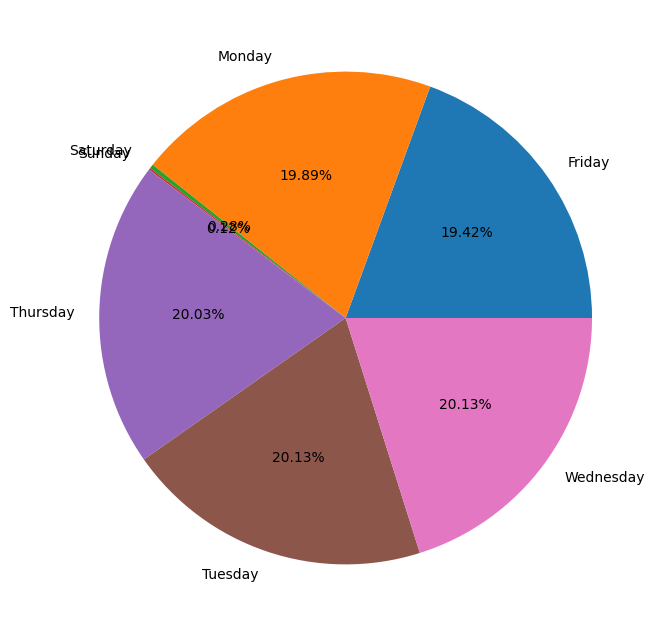

In [40]:
plt.figure(figsize=(10,8))
plt.pie(dw['High Price'],labels= dw['Day'],autopct='%1.2f%%');

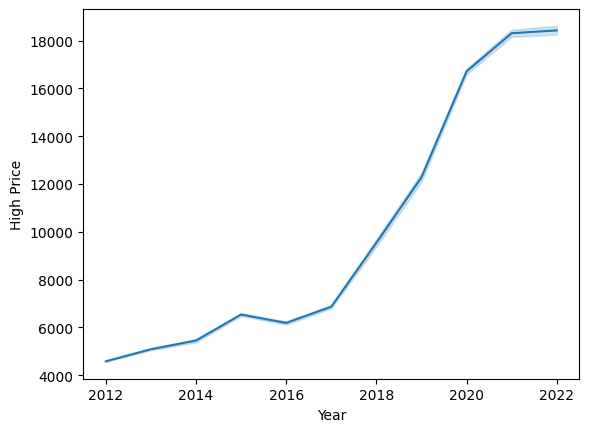

In [41]:
sns.lineplot(data=df, x="Year", y="High Price");

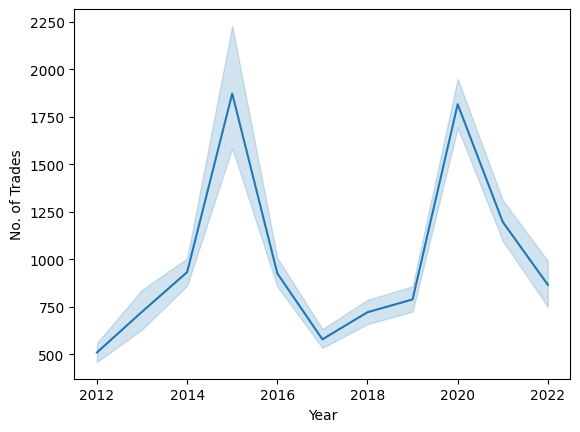

In [43]:
sns.lineplot(data=df, x="Year", y="No. of Trades");

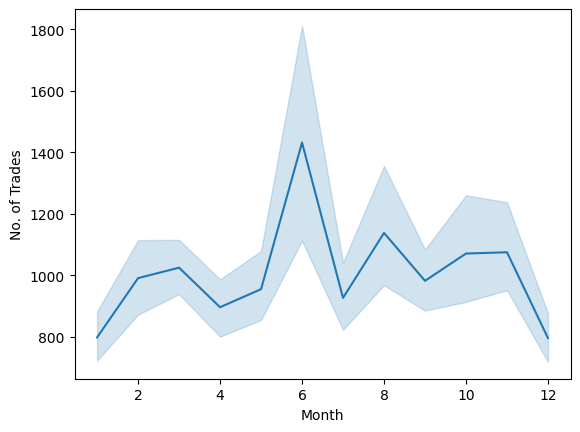

In [44]:
sns.lineplot(data=df,x='Month',y='No. of Trades');

#Model Building

In [45]:
df.columns

Index(['Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Day', 'Month', 'Year'],
      dtype='object')

In [46]:
df.drop(['No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Day', 'Month', 'Year'],axis=1,inplace=True)

In [47]:
x=df[['WAP']]
y=df['Close Price']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LinearRegression()

In [50]:
lr.score(X_train,y_train)

0.9998476190635321

In [51]:
lr.score(X_test,y_test)

0.9998792300352365

In [53]:
print(lr.coef_)
print(lr.intercept_)

[1.00075557]
-9.422185604056722


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


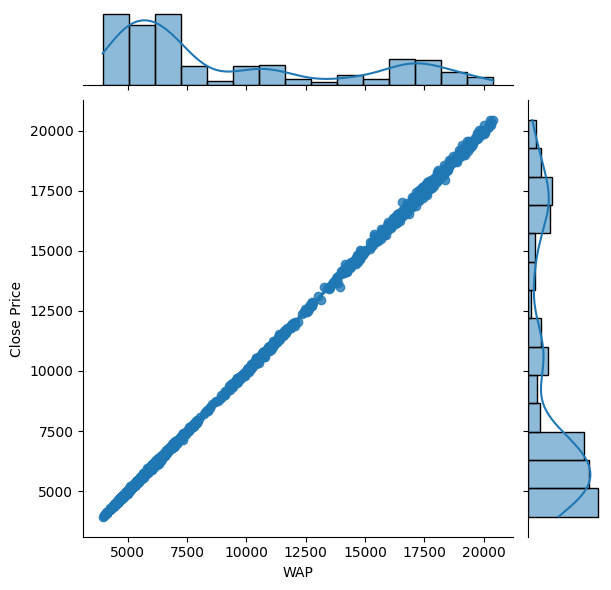

In [61]:
sns.jointplot(data=df, x='WAP', y='Close Price', kind="reg")
#sns.jointplot(x='WAP', y='Close Price', data=df, kind='reg', size=10);

In [62]:
y_pred = lr.predict(X_test)

In [64]:
from sklearn.metrics import r2_score, mean_squared_error

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared score: ", r_squared)
print("Mean Squared Error: ", mse)


R-squared score:  0.9998792300352365
Mean Squared Error:  2767.280256730457


#COMPARING ACTUAL AND PREDICTED VALUES

In [69]:
lr_diff=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
lr_diff


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Actual Value,Predicted Value
1581,5876.05,5885.668476
2109,5009.15,5037.505619
2154,5294.65,5269.852235
1647,6099.30,6110.527743
1964,4824.35,4803.696889
...,...,...
2374,4569.40,4568.438034
2535,4142.55,4129.138064
1003,8360.70,8339.703012
145,20312.05,20305.766997


In [70]:
lr_diff['Difference'] = lr_diff['Actual Value'] - lr_diff['Predicted Value']
print(lr_diff['Difference'].describe())


count    511.000000
mean      -1.198229
std       52.642832
min     -337.181141
25%      -20.487640
50%        0.961966
75%       19.603972
max      270.371547
Name: Difference, dtype: float64


In [73]:
"""from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)
scores""" 

"from sklearn.model_selection import KFold\nfrom sklearn.model_selection import cross_val_score\n\nscores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)\nscores"

In [74]:
print(scores)


[0.99985971 0.99986688 0.99983658 0.99984382 0.99982861]


In [75]:
accuracy_fold = np.mean(scores)


In [76]:
accuracy_fold

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.999847117569608

#**Applying the Multiple Regression Algorithm**

In [77]:
X=df.drop('Close Price',axis=1)
y=df['Close Price']

In [78]:
X

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open Price,High Price,Low Price,WAP
0,18150.00,18572.95,17772.90,18130.183442
1,18100.10,18415.00,18017.15,18295.559071
2,18470.05,18718.00,17845.60,18355.093320
3,18294.50,18684.50,18294.50,18511.224599
4,18371.20,18549.30,18248.25,18388.967826
...,...,...,...,...
2548,4114.00,4160.00,4076.00,4129.486321
2549,4118.00,4126.90,4080.00,4106.848723
2550,4100.00,4125.00,4081.40,4105.106055
2551,4061.00,4110.10,4060.10,4091.474315


In [79]:
y

0       18205.80
1       18313.70
2       17943.15
3       18549.85
4       18343.90
          ...   
2548     4143.25
2549     4101.85
2550     4120.60
2551     4095.35
2552     4070.35
Name: Close Price, Length: 2551, dtype: float64

In [83]:
X.shape

(2551, 4)

In [84]:
y.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2551,)

In [85]:
from sklearn.preprocessing import StandardScaler
# define StandScaler scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)
scaled

array([[ 1.78480375,  1.8346885 ,  1.75275482,  1.78690306],
       [ 1.77469957,  1.80300233,  1.80283601,  1.82046478],
       [ 1.84961021,  1.86378682,  1.76766128,  1.8325468 ],
       ...,
       [-1.0601603 , -1.06369878, -1.05455984, -1.05937874],
       [-1.06805735, -1.06668786, -1.05892721, -1.0621452 ],
       [-1.05208101, -1.06070971, -1.06222837, -1.06332903]])

In [87]:
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)

lr = LinearRegression().fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [88]:
lr.score(X_train, y_train)

0.9998906003316799

In [89]:
lr.score(X_test, y_test)

0.9998764543106008

#Performace Measures

In [90]:
y_pred = lr.predict(X_test)

In [91]:
y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([18535.79312787, 17661.12324811,  4608.22119471, 16650.32354825,
        5191.68450388,  6607.92119007,  5683.71267106, 11320.0921277 ,
        6813.37301406, 18041.01135519,  6170.90033716,  7730.81306056,
        6786.56660778, 15801.71794933, 17160.11788535,  6282.92868065,
        4264.31055622,  6092.65255664, 10669.89867915,  4951.96669677,
       16448.42430214, 10298.56367832,  6842.74301356, 15746.04554445,
       17058.99206881, 17743.2671453 , 17564.11789839,  5351.51956906,
       17712.41536213,  5314.93135508,  5087.23240404,  5100.46144823,
        6701.57147303, 17608.32256898,  9728.0446575 , 19931.0935501 ,
       16188.04312872,  4611.91859287, 16347.04603753,  4896.4799607 ,
        4569.38395877, 14093.28061243,  7063.5249431 ,  4567.61872787,
        4995.56488016,  6203.36904793,  6788.6510533 ,  6477.50571462,
       16904.08050855,  6471.16866669,  6197.88297048,  7751.42294496,
        5870.33438668, 10268.0805075 ,  9555.73923621,  4985.51490961,
      

In [92]:
print("R score",metrics.r2_score(y_test,y_pred))
print("MSE = ", metrics.mean_squared_error(y_test,y_pred))

R score 0.9998764543106008
MSE =  3032.4972121182595
